Final Project - Python Class Root Solver using Gauss-Newton, Bisection, and Secant Methods
Xing Hao Huang

Develop a Python class that finds the root of a function in a given interval using several wellknown
solver methods (e.g., bisection method, Newton’s method, and secant method).
Having the plotting functionality to show the progress of your algorithm is a requirement.
This project is appropriate for a single student.

Newton's Method - I learned about the Gauss-Newton Method in another class (Computational Physics at Wentworth Institute of Technology) and altered the code
                - https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/04%3A_Applications_of_Derivatives/4.09%3A_Newtons_Method
                
x' = x - f'(x)/f''(x)
roots are at x where x' = 0

Bisection Method - https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter19.03-Bisection-Method.html

If f(x) is a continuous function within the bound of (a, b) where f((b+a)/2) = 0, then (b+a)/2 or m is the root

Secant Method - https://patrickwalls.github.io/mathematicalpython/root-finding/secant/

If f(x) is a continuous function within the bound of (a, b) and f(a)f(b) < 0, root x = a-f(a)(b-a)/(f(b)-f(a))


In [109]:
import numpy as np
import random as r
import matplotlib.pyplot as plt

In [ ]:
class polynomial:
    '''
    A class to represent a polynomial function of one variable.

    ...

    Attributes
    ----------
    constants: list of num
        constants of each variable order, i.e. [a]x^2 + [b]x + [c]
        from highest order to zero-th order

    Methods
    -------
    func(x):
        returns value of polynomial equation at x
    d_func(x):
        returns value of the derivative of the polynomial equation at x
    dd_func(x):
        returns value of the second derivative of the polynomial equation at x
    tolerance(tol):
        sets new value of tolerance, default 0.005
    tangent(x0, x):
        function of tangent line set at x0
    newton(x):
        one iteration of Newton's Method
    bisection(a, b):
        one iteration of the Bisection Method
    secant(a, b):
        one iteration of the Secant Method
    show(a, b, n, method):
        displays figure of polynomial, can show root depending on method
    '''
    def __init__(self, constants:list):
        '''
        Constructs all the necessary attributes for the polynomial object.
        
        Parameters
        ----------
            constants: list of num
                constants of each variable order, i.e. [a]x^2 + [b]x + [c]
                from highest order to zeroth order

        '''
        self.order = len(constants) - 1
        self.constants = np.empty(len(constants), dtype=float)
        for i in range(len(constants)):
            self.constants[i] = constants[i]
        self.tol = 0.005

    @property
    def tolerance(self):
        return self.tol
    
    # setter function of tolerance
    @tolerance.setter
    def tolerance(self, tol):
        ''' 
        Redefines the tolerance used in the root algorithms

        Parameters
        ----------
            tol: num > 0
                must be a number greater than 0
        '''
        try:
            tol = float(tol)
        except:
            raise TypeError("Sorry, your tolerance is not a number") 
        else:
            if tol <= 0:
                raise ValueError("Sorry, your tolerance must be greater than 0")
            else:
                self.tol = tol

    def __str__(self):
        string = ''
        for i in range(self.order+1):   
            if self.constants[i] != 0:      # adds i-th term to str if constant is not 0
                if self.constants[i] > 0:   # if constant is positive, have a + sign between term
                    string += ' + '       
                elif self.constants[i] < 0: # if constant is negative, have a - sign between term
                    string += ' - '  
                match (self.order)-i:       # different behavior depending on i-th order of term
                    case 0:                 # 0th order term has no variable
                        string += f'{np.abs(self.constants[i])}'
                    case 1:                 # 1st order term has no exponents
                        string += f'{np.abs(self.constants[i])}x'
                    case _:                 # all other ordered term has ordered variabel
                        string += f'{np.abs(self.constants[i])}x^{self.order-i}'

        return string[3:]                   # returns string without the beginning sign

    def func(self, x:float):
        ''' 
        Returns the value of the polynomial function at x

        Parameters
        ----------
            x: float
                must be a number
        '''
        self.f_x = 0
        for i in range(len(self.constants)):
            self.f_x += self.constants[i] * np.pow(x,(self.order - i))
        return self.f_x
    
    def d_func(self,x:float):
        ''' 
        Returns the value of the first derivative of the polynomial function at x

        Parameters
        ----------
            x: float
                must be a number
        '''
        self.df_x = 0
        for i in range(len(self.constants)-1):
            self.df_x += (self.order - i) * self.constants[i] * np.pow(x,(self.order - i - 1))
        return self.df_x

    def dd_func(self,x:float): # not used in this function
        ''' 
        Returns the value of the second derivative of the polynomial function at x

        Parameters
        ----------
            x: float
                must be a number
        '''
        self.ddf_x = 0
        for i in range(len(self.constants)-2):
            self.ddf_x += (self.order - i) * (self.order - i - 1) * self.constants[i] * np.pow(x,(self.order - i - 2))
        return self.ddf_x

    def tangent(self, x0:float, x:float):
        ''' 
        Returns value of tangent line at a specific value x given the tangent line begins at x0
        
        Parameters
        ----------
            x0 = float
                initial x
            x = float
                must be a number
        '''
        return self.func(x0) + self.d_func(x0)*(x-x0)

    def newton(self, x:float):
        ''' 
        One iteration of the Newton's Method.

        Parameters
        ----------
            x = float
                must be a number
        '''
        diff = 2 * self.tol
        if abs(diff) > self.tol: 
            diff = self.func(x) / self.d_func(x)
            x -= diff
        return x

    def bisection(self, a:float, b:float):
        ''' 
        One iteration of the Bisection Method.

        Parameters
        ----------
            a: float
                lower bound
            b: float
                upper bound
        '''
        # check if b is greater than a
        if b < a:
            raise Exception("The value of your upper bound must be greater than the value of your lower bound")
        
        # midpoint
        m = (a + b) / 2

        # dir is which bound will be set as m, dir = -1 to replace lower bound with m, dir = 1 to replace upper bound with m, dir = 0 means m = root
        if np.abs(self.func(m)) < self.tol:
            return m, 0
        elif np.sign(self.func(a)) == np.sign(self.func(m)):
            return m, -1
        elif np.sign(self.func(b)) == np.sign(self.func(m)):
            return m, 1

    def secant(self, a:float, b:float):
        '''
        One iteration of the Secant Method.

        Parameters
        ----------
            a: float
                lower bound
            b: float
                upper bound
        '''
        # check if b is greater than a
        if b < a:
            raise Exception("The value of your upper bound must be greater than the value of your lower bound")
        # checks if root exists at interval
        elif self.func(a)*self.func(b) >= 0:
            raise Exception("Your interval does not have a root")
        
        m = a - self.func(a)*(b-a)/(self.func(b)-self.func(a))

        # dir is which bound will be set as m, dir = -1 to replace upper bound with m, dir = 1 to replace lower bound with m, dir = 0 means m = root
        if np.abs(self.func(m)) < self.tol:
            return m, 0
        elif self.func(a)*self.func(m) < 0:
            return m, -1
        elif self.func(b)*self.func(m) < 0:
            return m, 1

    def show(self, a:float, b:float, n:int, method:int=0):
        '''
        Displays the figure of polynomial and can be used to find one root.

        Parameters
        ----------
            a: float
                lower bound
            b: float
                upper bound
            n: int
                number of steps or divisions
            method: int
                0 (default) means Just Polynomial
                1 means Gauss-Newton Method
                2 means Bisection Method
                3 means Secant Method
        '''
        fig,ax = plt.subplots()

        # construct all necessary attribute for plot
        xs = np.linspace(a,b,n)                     # creates array of equally spaced values from a to b with n number of steps
        ys = self.func(xs)                          # creates array of value returned from polynomial for all elements in xs
        method_ys = np.empty((0,n), dtype=float)    # creates empty array for storing ys
        iteration = 0                               # iteration of Method to get root
        x = (b+a)/2                                 # defines x, defaults as midpoint of a and b

        ax.plot(xs,ys,color="purple", label='f(x)', linewidth='5')
        ax.set_xlabel("x")
        ax.set_ylabel("Y")

        r.seed()                                    # used to generate random colors for algorithm tangent line

        match method:
            case 0: # just displays polynomial
                ax.legend()
                ax.title.set_text(f"Graph of Polynomial: {self.__str__()}")
            case 1: # Newton's Method
                while np.abs(self.func(x)) > self.tol:                          # active while x is not the root, within range of tolerance
                    print(f'{x}, {self.func(x)}')                               
                    temp_ys = np.array([self.tangent(x,xs)])                    # creates array of tangent line with x0 as x
                    method_ys = np.append(method_ys, temp_ys, axis=0)           # transfers new array to empty array
                    x = self.newton(x)                                          # apply one iteration of Newton's Method
                    iteration += 1
                for i in range(iteration):                                      # graphs each tangent line generated during Newton's Method
                    ax.plot(xs,method_ys[i],color=(r.random(),r.random(),r.random()),label=f'Step {i+1}')
                ax.plot(x,0,color='blue',marker='o',label='root')
                ax.legend()
                ax.title.set_text("Newton's Method")
                print(f"Root of this interval using Newton's Method is {x}")
            case 2: # Bisection Method
                x, dir = self.bisection(a,b)                                    # used to create dir, x = midpoint already
                while dir != 0:                                                 
                    print(f'{a}, {self.func(a)} | {b}, {self.func(b)}')         
                    temp_ys = np.array([self.tangent(x,xs)])                    # creates array of tangent line with x0 as x
                    method_ys = np.append(method_ys, temp_ys, axis=0)           # transfers new array to empty array
                    # dir is which bound will be set as m, dir = -1 to replace lower bound with m, dir = 1 to replace upper bound with m, dir = 0 means m = root
                    if dir == -1:                                               
                        a = x
                    elif dir == 1:
                        b = x
                    x, dir = self.bisection(a,b)                                # apply one iteration of the Bisection Method
                    iteration += 1                                              
                for i in range(iteration):                                      # graphs each tangent line generated during the Bisection Method
                    ax.plot(xs,method_ys[i],color=(r.random(),r.random(),r.random()),label=f'Step {i+1}')
                ax.plot(x,0,color='blue',marker='o',label='root')
                ax.legend()
                ax.title.set_text("Bisection Method")
                print(f"Root of this interval using the Bisection Method is {x}")
            case 3: # Secant Method
                x, dir = self.secant(a,b)                                       # used to create dir, x = midpoint already
                while dir != 0:
                    print(f'{a}, {self.func(a)} | {b}, {self.func(b)}')         
                    temp_ys = np.array([self.tangent(x,xs)])                    # creates array of tangent line with x0 as x
                    method_ys = np.append(method_ys, temp_ys, axis=0)           # transfers new array to empty array  
                    # dir is which bound will be set as m, dir = -1 to replace upper bound with m, dir = 1 to replace lower bound with m, dir = 0 means m = root
                    if dir == -1:
                        b = x
                    elif dir == 1:
                        a = x
                    x, dir = self.secant(a,b)                                   # apply one iteration of the Bisection Method
                    iteration += 1
                for i in range(iteration):                                      # graphs each tangent line generated during the Bisection Method
                    ax.plot(xs,method_ys[i],color=(r.random(),r.random(),r.random()),label=f'Step {i+1}')
                ax.plot(x,0,color='blue',marker='o',label='root')
                ax.legend()
                ax.title.set_text("Secant Method")
                print(f"Root of this interval using the Secant Method is {x}")

            case _:
                raise Exception("Please enter a valid method to test")          # creates Exception Error if selecting a "method" that is not 0, 1, 2, 3


In [173]:
p1_constants = np.array([-1, 3, -9, 3])
p2_constants = np.array([3,2,1,-7,0,0,1])
p3_constants = np.array([-1,2,2,16,3.4,0])
p4_constants = np.array([1,-4,8,16])
p5_constants = np.array([3,1,-1.4,2.7,-0.23,-3,16])


p1 = polynomial(p1_constants)
p2 = polynomial(p2_constants)
p3 = polynomial(p3_constants)
p4 = polynomial(p4_constants)
p5 = polynomial(p5_constants)

print(f'first polynomial is \t{p1}')
print(f'second polynomial is \t{p2}')
print(f'third polynomial is \t{p3}')
print(f'fourth polynomial is \t{p4}')
print(f'fifth polynomial is \t{p5}')

first polynomial is 	1.0x^3 + 3.0x^2 - 9.0x + 3.0
second polynomial is 	3.0x^6 + 2.0x^5 + 1.0x^4 - 7.0x^3 + 1.0
third polynomial is 	1.0x^5 + 2.0x^4 + 2.0x^3 + 16.0x^2 + 3.4x
fourth polynomial is 	1.0x^3 - 4.0x^2 + 8.0x + 16.0
fifth polynomial is 	3.0x^6 + 1.0x^5 - 1.4x^4 + 2.7x^3 - 0.23x^2 - 3.0x + 16.0


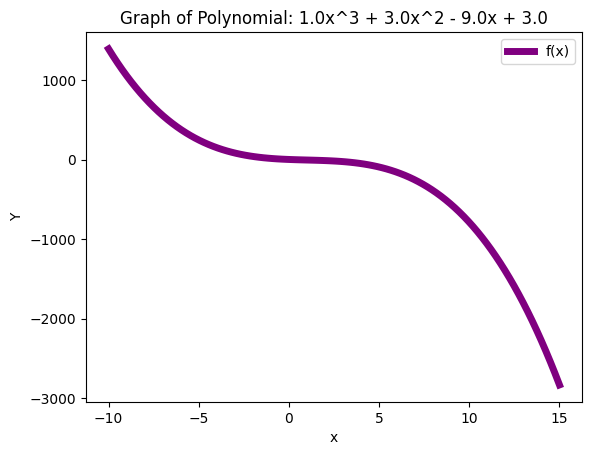

In [174]:
p1.show(-10,15,100)

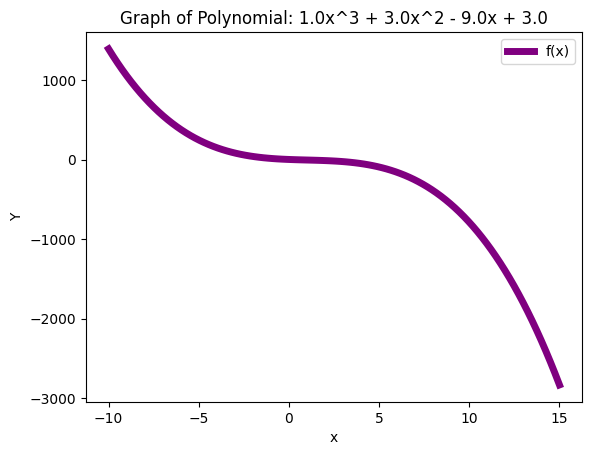

In [175]:
p1.show(-10,15,100,0)

2.5, -16.375
1.2156862745098038, -5.304151495277079
0.3517562826996916, 0.1618672248940829
Root of this interval using Newton's Method is 0.37405001776564023


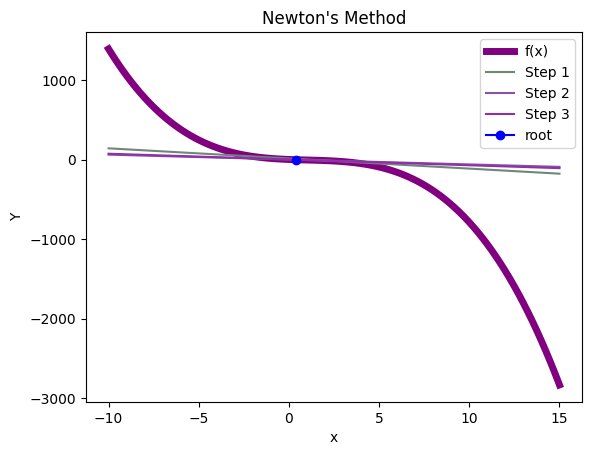

In [176]:
p1.show(-10,15,100,1)

-10, 1393.0 | 15, -2832.0
-10, 1393.0 | 2.5, -16.375
-3.75, 131.671875 | 2.5, -16.375
-0.625, 10.041015625 | 2.5, -16.375
-0.625, 10.041015625 | 0.9375, -3.624755859375
0.15625, 1.663177490234375 | 0.9375, -3.624755859375
0.15625, 1.663177490234375 | 0.546875, -1.1882133483886719
0.3515625, 0.16327428817749023 | 0.546875, -1.1882133483886719
0.3515625, 0.16327428817749023 | 0.44921875, -0.5282275080680847
0.3515625, 0.16327428817749023 | 0.400390625, -0.18676535040140152
0.3515625, 0.16327428817749023 | 0.3759765625, -0.012861371971666813
0.36376953125, 0.07492204091977328 | 0.3759765625, -0.012861371971666813
0.369873046875, 0.030959912299294956 | 0.3759765625, -0.012861371971666813
Root of this interval using the Bisection Method is 0.37445068359375


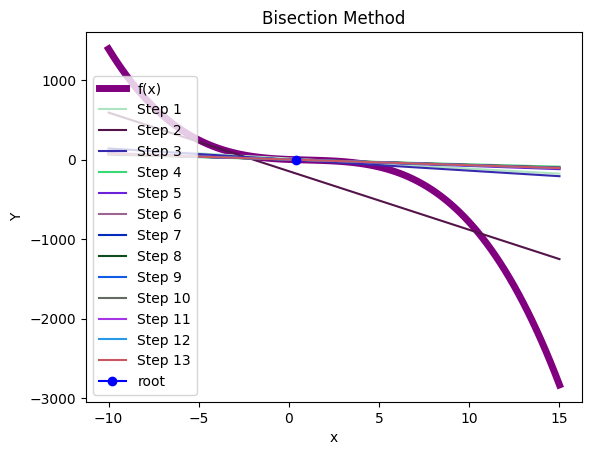

In [177]:
p1.show(-10,15,100,2)

-10, 1393.0 | 15, -2832.0
-1.7573964497041423, 33.50951239214149 | 15, -2832.0
-1.5614340278161694, 28.174030097360916 | 15, -2832.0
-1.3982962831037378, 24.18435836479881 | 15, -2832.0
-1.2594459064740662, 21.09136325598823 | 15, -2832.0
-1.1392486059701052, 18.625516007785464 | 15, -2832.0
-1.0337974228609645, 16.61524581188961 | 15, -2832.0
-0.9402763740388909, 14.946163172799551 | 15, -2832.0
-0.8565916262246253, 13.539095710938577 | 15, -2832.0
-0.7811458479535364, 12.337525614440256 | 15, -2832.0
-0.7126939538407642, 11.300044144269817 | 15, -2832.0
-0.6502474541583012, 10.39563110990901 | 15, -2832.0
-0.5930090466925915, 9.6005980095379 | 15, -2832.0
-0.5403266916419747, 8.896548988661758 | 15, -2832.0
-0.4916606190385148, 8.268985266513216 | 15, -2832.0
-0.446559146580394, 7.70632815750462 | 15, -2832.0
-0.4046406381390342, 7.19922133022411 | 15, -2832.0
-0.36557982950209467, 6.740023537427849 | 15, -2832.0
-0.3290973165356496, 6.322433879339462 | 15, -2832.0
-0.294951370656874

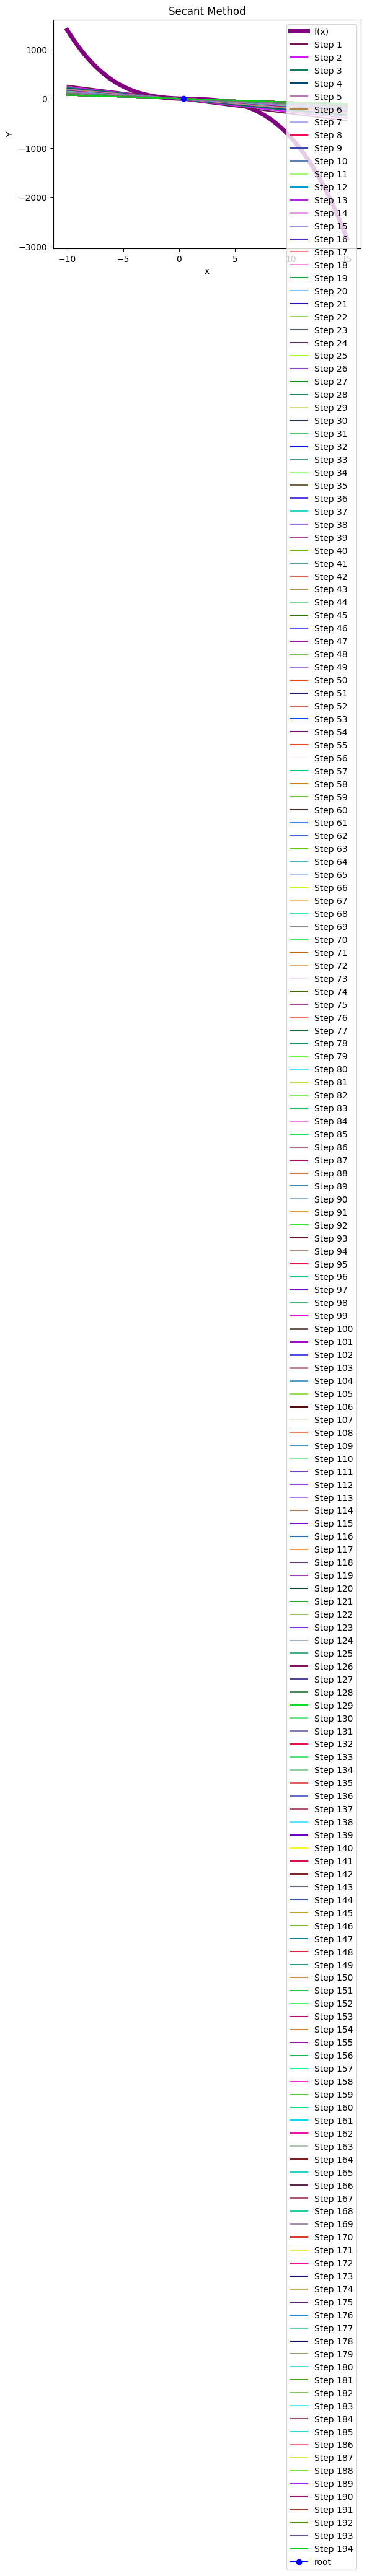

In [178]:
p1.show(-10,15,100,3)

2.5, 858.421875
2.087235161532682, 283.61290503473845
1.7526857105689102, 92.7920414052723
1.4868835949600743, 29.829843136232988
1.2831472957927044, 9.269077142123397
1.1373956442162632, 2.675900477173233
1.0473519103890119, 0.6414428102267475
1.007945024843214, 0.09059028485256615
Root of this interval using Newton's Method is 1.00027386084285


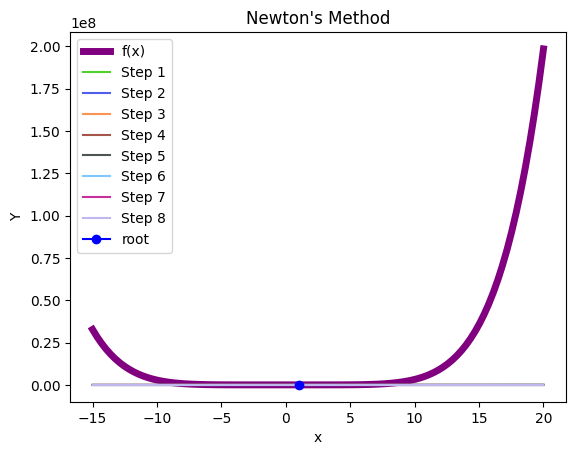

In [179]:
p2.show(-15,20,100,1)

-100, 10198159660.0 | 101, -10299755537.6
0.5, 6.04375 | 101, -10299755537.6
0.5, 6.04375 | 50.75, -323081405.6873047
0.5, 6.04375 | 25.625, -10142308.301177979
0.5, 6.04375 | 13.0625, -314843.9439310074
0.5, 6.04375 | 6.78125, -8728.18433893323
3.640625, 32.738614240847525 | 6.78125, -8728.18433893323
3.640625, 32.738614240847525 | 5.2109375, -1632.355673738703
3.640625, 32.738614240847525 | 4.42578125, -428.8750186788473
3.640625, 32.738614240847525 | 4.033203125, -132.80404206887988
3.640625, 32.738614240847525 | 3.8369140625, -36.5534077833448
3.73876953125, 1.1422770075000468 | 3.8369140625, -36.5534077833448
3.73876953125, 1.1422770075000468 | 3.787841796875, -16.904609813602292
3.73876953125, 1.1422770075000468 | 3.7633056640625, -7.685835806178103
3.73876953125, 1.1422770075000468 | 3.75103759765625, -3.2235522585804013
3.73876953125, 1.1422770075000468 | 3.744903564453125, -1.0286560298543233
3.7418365478515625, 0.05979652016179671 | 3.744903564453125, -1.0286560298543233
3.74

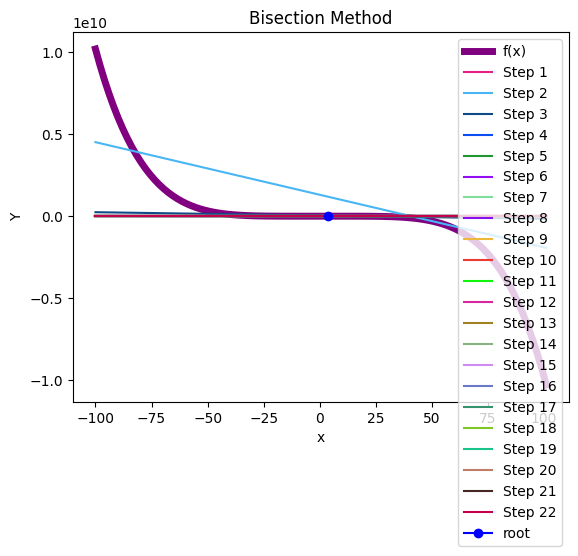

In [180]:
p3.show(-100,101,100,2)

-10, -1464.0 | 10, 696.0
-10, -1464.0 | 3.5555555555555554, 38.82578875171467
-10, -1464.0 | 3.2053452115812906, 33.47828932787246
-10, -1464.0 | 2.9101206525219503, 30.050992591184496
-10, -1464.0 | 2.650449502069863, 27.72316225573131
-10, -1464.0 | 2.4153452461142972, 26.078056234871564
-10, -1464.0 | 2.198062621121071, 24.878477847579838
-10, -1464.0 | 1.9942385782470904, 23.97702050970507
-10, -1464.0 | 1.8009653620448578, 23.275206307582
-10, -1464.0 | 1.6162854169578011, 22.70311849181655
-10, -1464.0 | 1.4388956604047323, 22.20860178853539
-10, -1464.0 | 1.2679628059475476, 21.75132517130669
-10, -1464.0 | 1.103000393423974, 21.29948483874798
-10, -1464.0 | 0.9437811982661568, 20.82800535859003
-10, -1464.0 | 0.7902703992927247, 20.317599420248598
-10, -1464.0 | 0.6425712871252038, 19.754295169583788
-10, -1464.0 | 0.500879030358945, 19.12917346314828
-10, -1464.0 | 0.3654402971175035, 18.438139247024907
-10, -1464.0 | 0.2365179316607886, 17.681611511525464
-10, -1464.0 | 0.114

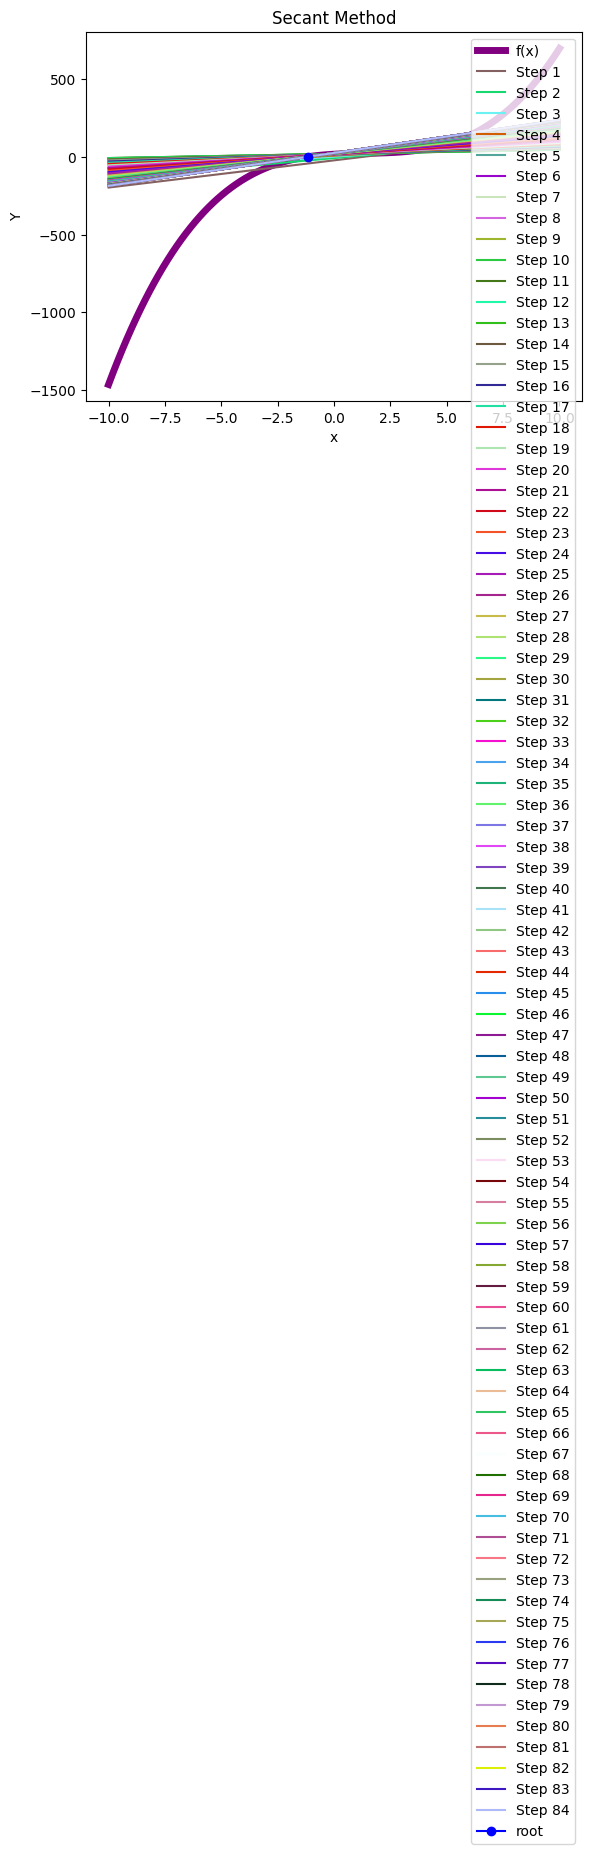

In [181]:
p4.show(-10,10,100,3)

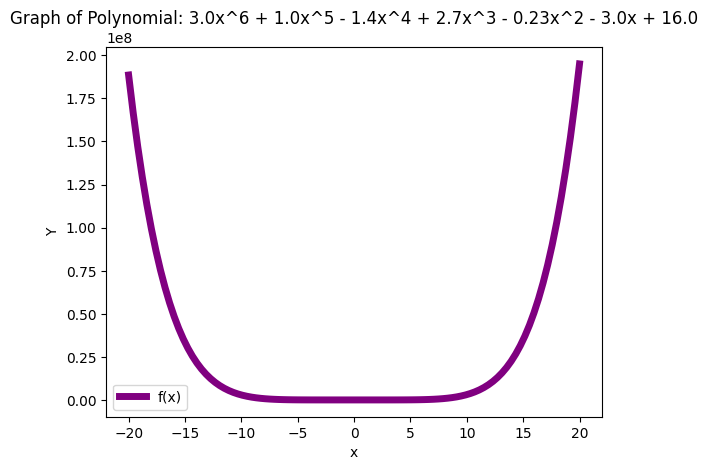

In [182]:
p5.show(-20,20,100)